https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### importing the dataset:

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
data

day  month    year  Temperature    RH    Ws  Rain   FFMC   DMC    DC  \
0     1.0    6.0  2012.0         29.0  57.0  18.0    0.0  65.7   3.4   7.6   
1     2.0    6.0  2012.0         29.0  61.0  13.0    1.3  64.4   4.1   7.6   
2     3.0    6.0  2012.0         26.0  82.0  22.0   13.1  47.1   2.5   7.1   
3     4.0    6.0  2012.0         25.0  89.0  13.0    2.5  28.6   1.3   6.9   
4     5.0    6.0  2012.0         27.0  77.0  16.0    0.0  64.8   3.0  14.2   
..    ...    ...     ...          ...   ...   ...    ...   ...   ...   ...   
242  26.0    9.0  2012.0         30.0  65.0  14.0    0.0  85.4  16.0  44.5   
243  27.0    9.0  2012.0         28.0  87.0  15.0    4.4  41.1   6.5     8   
244  28.0    9.0  2012.0         27.0  87.0  29.0    0.5  45.9   3.5   7.9   
245  29.0    9.0  2012.0         24.0  54.0  18.0    0.1  79.7   4.3  15.2   
246  30.0    9.0  2012.0         24.0  64.0  15.0    0.2  67.3   3.8  16.5   

     ISI   BUI  FWI     Classes                   Region  
0    1.3   3.4  0.5   not fire             Bejaia Region  
1    1.0   3.9  0.4   not fire             Bejaia Region  
2    0.3   2.7  0.1   not fire             Bejaia Region  
3    0.0   1.7    0   not fire             Bejaia Region  
4    1.2   3.9  0.5   not fire             Bejaia Region  
..   ...   ...  ...           ...                    ...  
242  4.5  16.9  6.5       fire     Sidi-Bel Abbes Region  
243  0.1   6.2    0   not fire     Sidi-Bel Abbes Region  
244  0.4   3.4  0.2   not fire     Sidi-Bel Abbes Region  
245  1.7   5.1  0.7   not fire     Sidi-Bel Abbes Region  
246  1.2   4.8  0.5  not fire      Sidi-Bel Abbes Region  

[247 rows x 15 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH          244 non-null    float64
 5    Ws          244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(11), object(4)
memory usage: 29.1+ KB


In [4]:
data.describe()

day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC         ISI         BUI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean     0.760656   77.887705   14.673361    4.774180   16.664754  
std      1.999406   14.337571   12.368039    4.175318   14.204824  
min      0.000000   28.600000    0.700000    0.000000    1.100000  
25%      0.000000   72.075000    5.800000    1.400000    6.000000  
50%      0.000000   83.500000   11.300000    3.500000   12.250000  
75%      0.500000   88.300000   20.750000    7.300000   22.525000  
max     16.800000   96.000000   65.900000   19.000000   68.000000

In [5]:
data.isnull().sum()

day            3
month          3
year           3
Temperature    3
 RH            3
 Ws            3
Rain           3
FFMC           3
DMC            3
DC             3
ISI            3
BUI            3
FWI            3
Classes        4
Region         3
dtype: int64

In [6]:
data.isna().sum()

day            3
month          3
year           3
Temperature    3
 RH            3
 Ws            3
Rain           3
FFMC           3
DMC            3
DC             3
ISI            3
BUI            3
FWI            3
Classes        4
Region         3
dtype: int64

<AxesSubplot:>

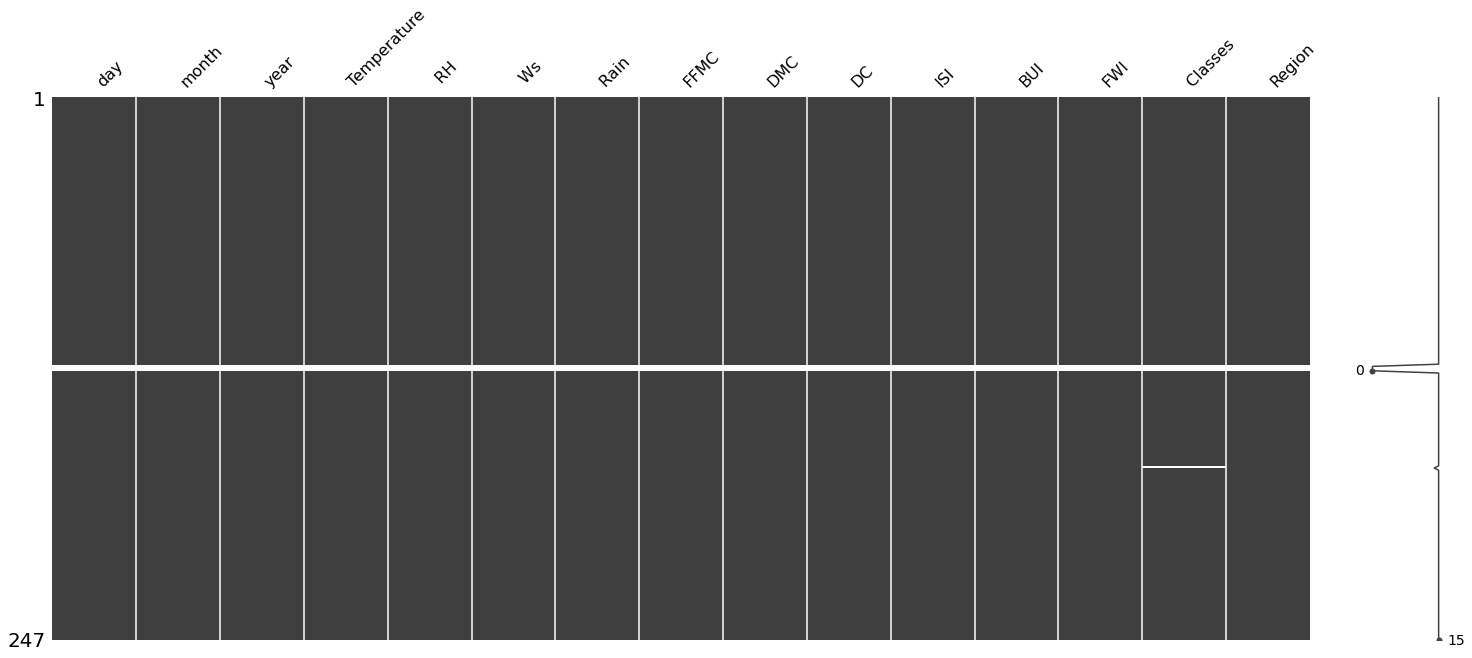

In [7]:
msno.matrix(data)

In [8]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [10]:
data.dropna(inplace=True)

<AxesSubplot:>

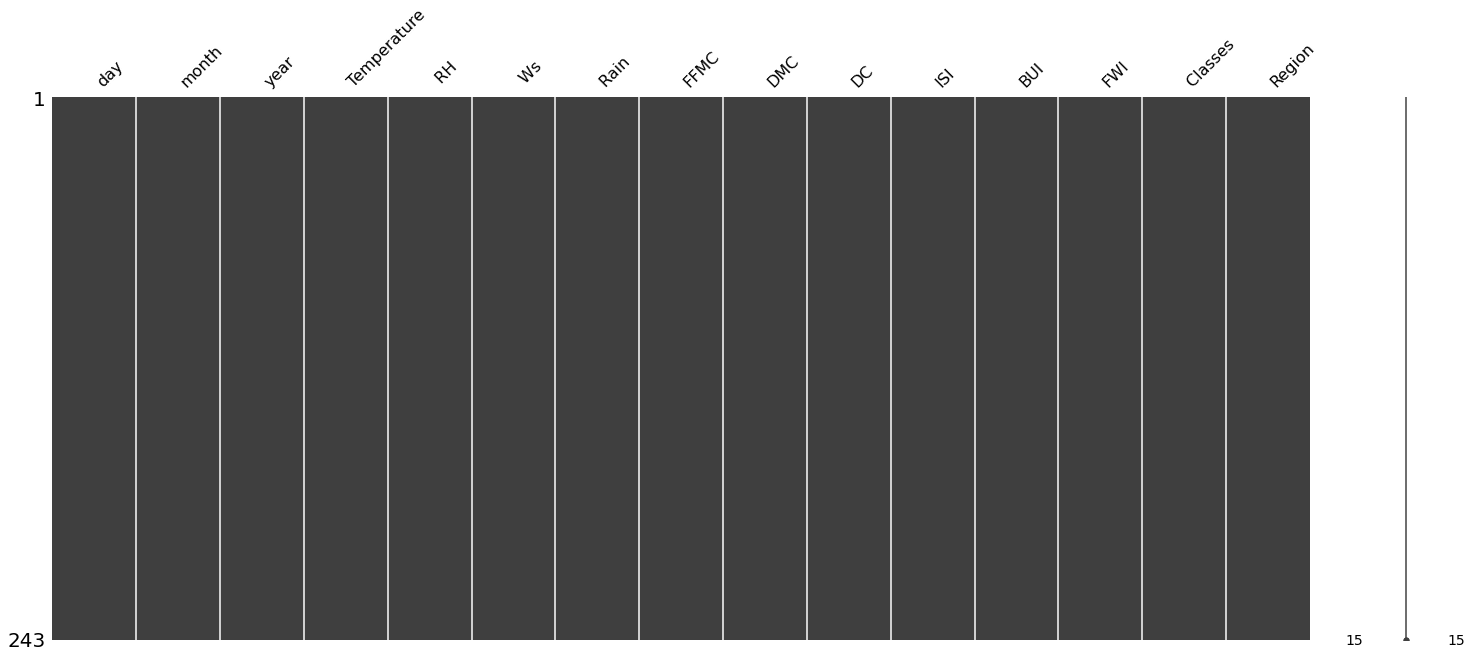

In [14]:
msno.matrix(data)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(11), object(4)
memory usage: 30.4+ KB


In [22]:
data.day = data.day.astype('int').astype('O')

In [25]:
data.month = data.month.astype('int').astype('O')

In [26]:
data.year = data.year.astype('int').astype('O')

In [27]:
data.head()

day month  year  Temperature    RH    Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0   1     6  2012         29.0  57.0  18.0    0.0  65.7  3.4   7.6  1.3  3.4   
1   2     6  2012         29.0  61.0  13.0    1.3  64.4  4.1   7.6  1.0  3.9   
2   3     6  2012         26.0  82.0  22.0   13.1  47.1  2.5   7.1  0.3  2.7   
3   4     6  2012         25.0  89.0  13.0    2.5  28.6  1.3   6.9  0.0  1.7   
4   5     6  2012         27.0  77.0  16.0    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes           Region  
0  0.5  not fire     Bejaia Region  
1  0.4  not fire     Bejaia Region  
2  0.1  not fire     Bejaia Region  
3    0  not fire     Bejaia Region  
4  0.5  not fire     Bejaia Region

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    object 
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(8), object(7)
memory usage: 30.4+ KB


In [29]:
data.FWI = data.FWI.astype('float')

In [30]:
data.DC = data.DC.astype('float')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    object 
 1   month        243 non-null    object 
 2   year         243 non-null    object 
 3   Temperature  243 non-null    float64
 4    RH          243 non-null    float64
 5    Ws          243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    object 
dtypes: float64(10), object(5)
memory usage: 30.4+ KB


In [32]:
data.head()

day month  year  Temperature    RH    Ws  Rain   FFMC  DMC    DC  ISI  BUI  \
0   1     6  2012         29.0  57.0  18.0    0.0  65.7  3.4   7.6  1.3  3.4   
1   2     6  2012         29.0  61.0  13.0    1.3  64.4  4.1   7.6  1.0  3.9   
2   3     6  2012         26.0  82.0  22.0   13.1  47.1  2.5   7.1  0.3  2.7   
3   4     6  2012         25.0  89.0  13.0    2.5  28.6  1.3   6.9  0.0  1.7   
4   5     6  2012         27.0  77.0  16.0    0.0  64.8  3.0  14.2  1.2  3.9   

   FWI    Classes           Region  
0  0.5  not fire     Bejaia Region  
1  0.4  not fire     Bejaia Region  
2  0.1  not fire     Bejaia Region  
3  0.0  not fire     Bejaia Region  
4  0.5  not fire     Bejaia Region

In [62]:
data['id'] = 0

In [64]:
i = 0
for i in range(len(data['day'])):
    data.iloc[i,15] = i
    i+=1
data['id']

0        0
1        1
2        2
3        3
4        4
      ... 
242    238
243    239
244    240
245    241
246    242
Name: id, Length: 243, dtype: int64

In [66]:
data

day month  year  Temperature    RH    Ws  Rain   FFMC   DMC    DC  ISI  \
0     1     6  2012         29.0  57.0  18.0    0.0  65.7   3.4   7.6  1.3   
1     2     6  2012         29.0  61.0  13.0    1.3  64.4   4.1   7.6  1.0   
2     3     6  2012         26.0  82.0  22.0   13.1  47.1   2.5   7.1  0.3   
3     4     6  2012         25.0  89.0  13.0    2.5  28.6   1.3   6.9  0.0   
4     5     6  2012         27.0  77.0  16.0    0.0  64.8   3.0  14.2  1.2   
..   ..   ...   ...          ...   ...   ...    ...   ...   ...   ...  ...   
242  26     9  2012         30.0  65.0  14.0    0.0  85.4  16.0  44.5  4.5   
243  27     9  2012         28.0  87.0  15.0    4.4  41.1   6.5   8.0  0.1   
244  28     9  2012         27.0  87.0  29.0    0.5  45.9   3.5   7.9  0.4   
245  29     9  2012         24.0  54.0  18.0    0.1  79.7   4.3  15.2  1.7   
246  30     9  2012         24.0  64.0  15.0    0.2  67.3   3.8  16.5  1.2   

      BUI  FWI     Classes                   Region   id  
0     3.4  0.5   not fire             Bejaia Region    0  
1     3.9  0.4   not fire             Bejaia Region    1  
2     2.7  0.1   not fire             Bejaia Region    2  
3     1.7  0.0   not fire             Bejaia Region    3  
4     3.9  0.5   not fire             Bejaia Region    4  
..    ...  ...           ...                    ...  ...  
242  16.9  6.5       fire     Sidi-Bel Abbes Region  238  
243   6.2  0.0   not fire     Sidi-Bel Abbes Region  239  
244   3.4  0.2   not fire     Sidi-Bel Abbes Region  240  
245   5.1  0.7   not fire     Sidi-Bel Abbes Region  241  
246   4.8  0.5  not fire      Sidi-Bel Abbes Region  242  

[243 rows x 16 columns]

In [67]:
num_data = [i for i in data.columns if data[i].dtype != 'O']
cat_data = [i for i in data.columns if data[i].dtype == 'O']

In [68]:
num_df = data[num_data]
cat_df = data[cat_data]

In [69]:
num_df

Temperature    RH    Ws  Rain   FFMC   DMC    DC  ISI   BUI  FWI   id
0           29.0  57.0  18.0    0.0  65.7   3.4   7.6  1.3   3.4  0.5    0
1           29.0  61.0  13.0    1.3  64.4   4.1   7.6  1.0   3.9  0.4    1
2           26.0  82.0  22.0   13.1  47.1   2.5   7.1  0.3   2.7  0.1    2
3           25.0  89.0  13.0    2.5  28.6   1.3   6.9  0.0   1.7  0.0    3
4           27.0  77.0  16.0    0.0  64.8   3.0  14.2  1.2   3.9  0.5    4
..           ...   ...   ...    ...   ...   ...   ...  ...   ...  ...  ...
242         30.0  65.0  14.0    0.0  85.4  16.0  44.5  4.5  16.9  6.5  238
243         28.0  87.0  15.0    4.4  41.1   6.5   8.0  0.1   6.2  0.0  239
244         27.0  87.0  29.0    0.5  45.9   3.5   7.9  0.4   3.4  0.2  240
245         24.0  54.0  18.0    0.1  79.7   4.3  15.2  1.7   5.1  0.7  241
246         24.0  64.0  15.0    0.2  67.3   3.8  16.5  1.2   4.8  0.5  242

[243 rows x 11 columns]

In [73]:
cat_df['id'] = 0

C:\Users\athar\AppData\Local\Temp\ipykernel_20144\2923175895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['id'] = 0


In [74]:
i = 0
for i in range(len(cat_df['day'])):
    cat_df.iloc[i,5] = i
    i+=1
cat_df['id']

0        0
1        1
2        2
3        3
4        4
      ... 
242    238
243    239
244    240
245    241
246    242
Name: id, Length: 243, dtype: int64

In [77]:
num_df.value_counts()

Temperature   RH    Ws   Rain   FFMC  DMC   DC     ISI   BUI   FWI   id 
22.0         76.0  26.0  8.3    47.4  1.1   7.0    0.4   1.6   0.1   105    1
35.0         54.0  11.0  0.1    83.7  8.4   26.3   3.1   9.3   3.1   127    1
34.0         49.0  15.0  0.0    89.2  24.8  159.1  8.1   35.7  16.0  211    1
             51.0  16.0  3.8    77.5  8.0   9.5    2.0   7.7   1.3   161    1
             53.0  18.0  0.0    89.0  21.6  80.3   9.2   25.8  15.0  26     1
                                                                           ..
31.0         62.0  15.0  0.0    83.3  5.8   17.7   3.8   6.4   3.2   219    1
             64.0  15.0  0.0    86.7  14.2  63.8   5.7   18.3  8.4   24     1
                   18.0  0.0    86.8  17.8  71.8   6.7   21.6  10.6  25     1
             65.0  14.0  0.0    84.5  12.5  54.3   4.0   15.8  5.6   10     1
42.0         24.0  9.0   0.0    96.0  30.3  76.4   15.7  30.4  24.0  198    1
Length: 243, dtype: int64

In [78]:
num_df.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'id'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

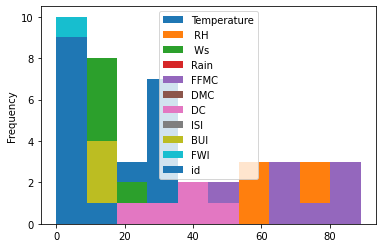

In [82]:
num_df[:10].plot.hist()

<AxesSubplot:ylabel='Frequency'>

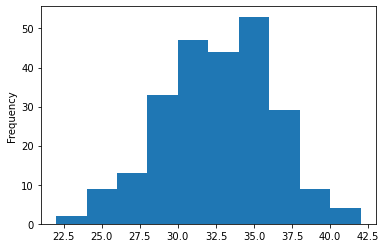

In [83]:
num_df['Temperature'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

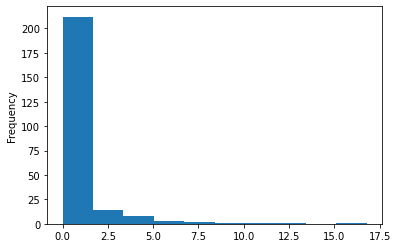

In [85]:
num_df['Rain '].plot.hist()

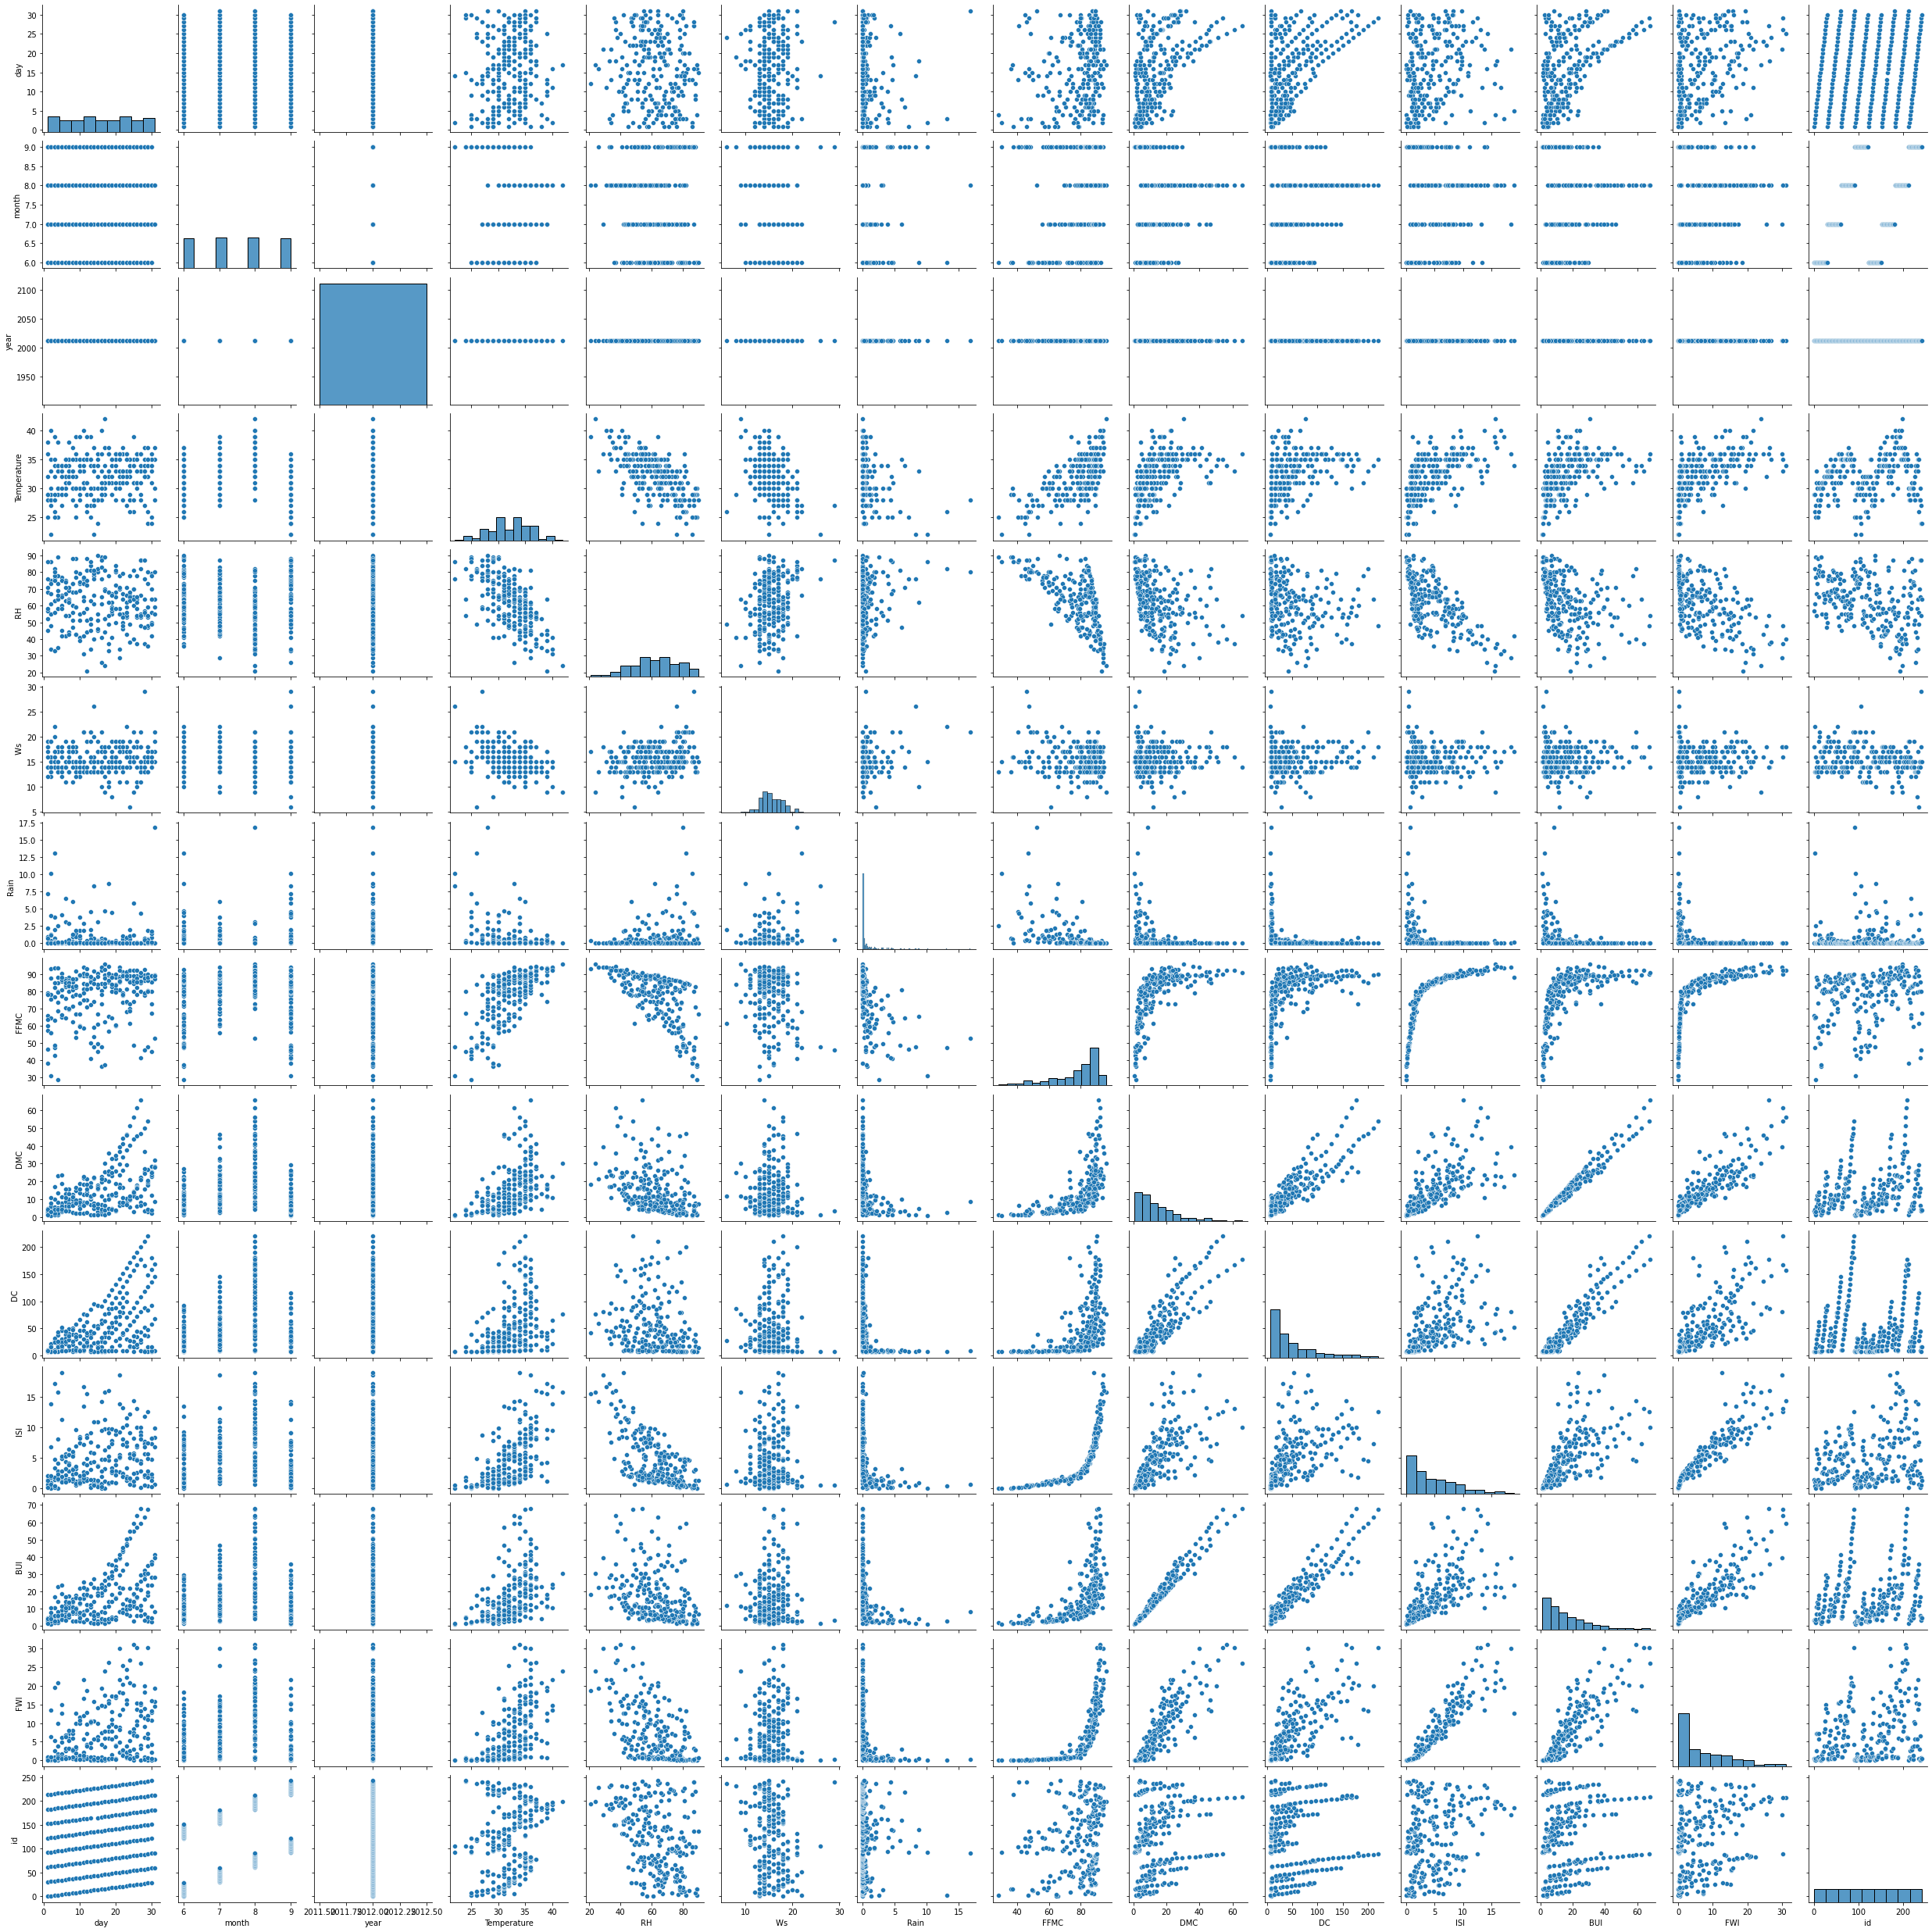

In [86]:
sns.pairplot(data)

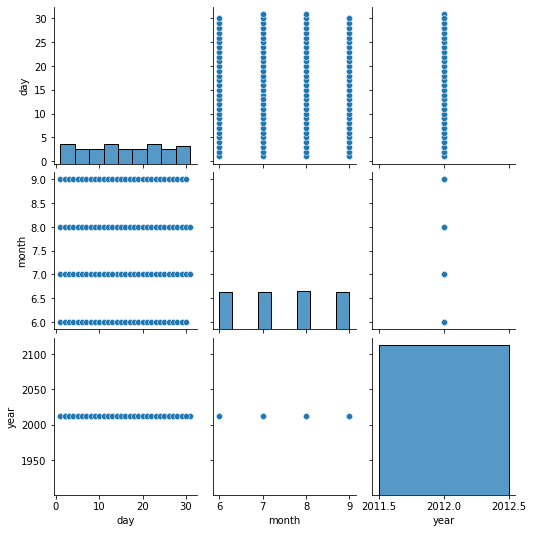

In [87]:
sns.pairplot(data[['day','month','year']])

In [88]:
data.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region', 'id'],
      dtype='object')

C:\Users\athar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Rain '>

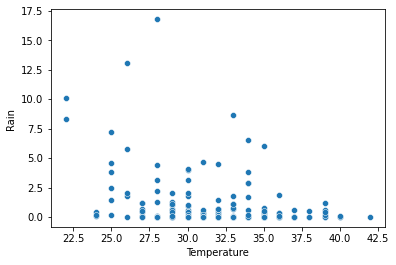

In [89]:
sns.scatterplot(data['Temperature'],data['Rain '])